 데이터는 순차적으로 df1,df2..로 만들었습니다.

각 데이터를 순차적으로 분석한 후, 다음 데이터로 넘어갔습니다

 마지막 데이터 (카드소비 업종코드/df5)는 필요한 곳에 병합 용도로만 썻습니다

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# 데이터 프레임 생성을 위한 라이브러리
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 1. 성별연령대별 카드소비패턴
- 각 성별/연령대별 카드소비패턴을 분석 해보겠습니다



In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/카드 소비/블록별 성별연령대별 카드소비패턴.csv', encoding='cp949')
df1

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30대,75450,45
496,SS044,201707,353037,F,30대,118708,25
497,SS054,201901,418149,F,20대,1056300,15
498,SS021,202009,269015,F,70대이상,25150,5


- 연령대별(AGE)를 int로 바꿉니다

In [4]:
def change_age(text:str):
    return text[:2]

df1['연령대별(AGE)'] = df1['연령대별(AGE)'].map(change_age).astype(int)

- (g)ender, (a)ge 별 카드 이용금액/이용건수 파악을 위해 df_ga라는 데이터프레임 생성하고, 성별, 연령대별로 group했습니다.

In [5]:
df_ga = df1[['성별(GEDNER)','연령대별(AGE)','카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)']]

# 각 그룹의 총 카드이용금액계, 카드이용건수계
df_sum = df_ga.groupby(['성별(GEDNER)','연령대별(AGE)']).sum().reset_index()
pd.options.display.float_format = '{:.0f}'.format  # 소수점 방지

- 카드 이용금액은 주로 남성이 많다는걸 알 수 있습니다. 그중에서도 20대가 눈에 띕니다.
- 카드 이용건수계는 주로 여성이 많다는걸 알 수 있습니다. 30대~50대가 다른 연령대의 비해 월등히 많습니다.
- df_amt는 총 카드이용금액, df_usect는 총 카드이용건수를 나타냅니다.

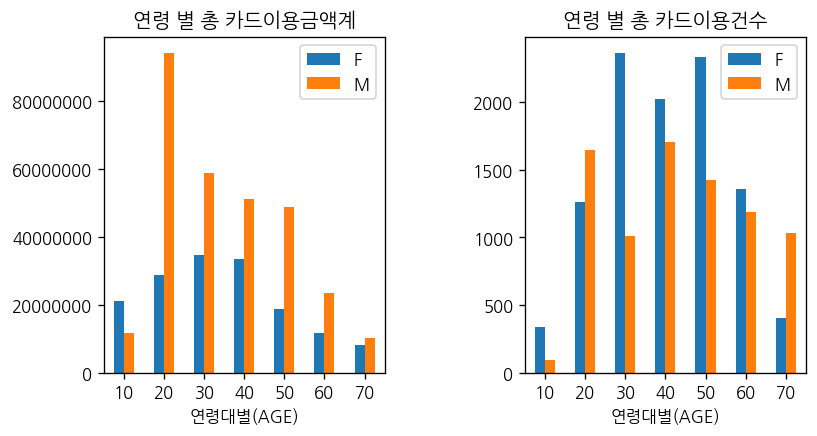

In [6]:
df_amt = pd.pivot_table(df_sum, index='연령대별(AGE)', columns='성별(GEDNER)', values='카드이용금액계(AMT_CORR)')
df_usect = pd.pivot_table(df_sum, index='연령대별(AGE)', columns='성별(GEDNER)', values='카드이용건수계(USECT_CORR)')

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[0].set_title('연령 별 총 카드이용금액계')
df_amt.plot(kind='bar',ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[1].set_title('연령 별 총 카드이용건수')
df_usect.plot(kind='bar',ax=axes[1])
axes[1].tick_params(axis='x', rotation=0)
axes[0].legend(loc='best', fontsize=10)
axes[1].legend(loc='best', fontsize=10)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)

- 5번째 데이터를 불러오겠습니다.

In [7]:
df5 = pd.read_csv('/content/drive/MyDrive/카드 소비/카드소비 업종코드.csv', encoding='cp949')
df5

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점
...,...,...,...,...
70,ss084,스포츠/문화/레저,스포츠/문화/레저,스키
71,ss090,교육/학원,학원,입시보습학원
72,ss091,교육/학원,학원,외국어학원
73,ss092,교육/학원,학원,예체능학원


- 5번째 데이터를 보니 업종코드를 통하여 다른 데이터와 병합을 해야할것 같습니다.
- 병합 전에 업종코드를 대문자로 바꿔줍니다.
- 1번째 데이터와 병합하여 성별/연령대별 주 소비 업종을 분석 하겠습니다.

In [8]:
df5['업종코드(UPJONG_CD)'] = df5['업종코드(UPJONG_CD)'].str.upper()
# inner join을 통하여 병합
df15 = pd.merge(df1, df5, how='inner', left_on='서울시민업종코드(UPJONG_CD)', right_on='업종코드(UPJONG_CD)')

# 필요한 column만 가져옴
df15 = df15[['성별(GEDNER)','연령대별(AGE)','대분류(CLASS1)','중분류(CLASS2)','소분류(CLASS3)']]
df15['count'] = 1  # 수를 세기위해 count column을 새로 만들어줌
df_15g = df15.groupby(['성별(GEDNER)','대분류(CLASS1)'])['count'].sum().reset_index()

- 그래프를 보니 요식/유흥이 가장 많이 소비 되는것을 알 수 있습니다.
- 의류/잡화, 요식/유흥, 음/식료품, 의료를 제외 모든 분야에서 남성 소비가 더 많습니다.

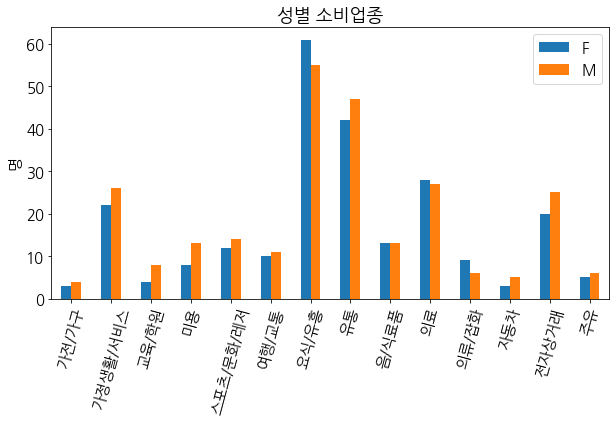

In [9]:
pd.pivot_table(df_15g, index='대분류(CLASS1)', columns='성별(GEDNER)', values='count').plot(kind='bar',figsize=(10,5))
plt.xlabel('', fontsize=15)
plt.ylabel('명', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.title('성별 소비업종', fontsize=18)
plt.legend(fontsize=15)

- 가장 소비가 많은 요식/유흥을 더 자세히 보겠습니다.

In [10]:
df_food = df15[df15['대분류(CLASS1)'] == '요식/유흥']
df_food = df_food.groupby(['성별(GEDNER)','소분류(CLASS3)'])['count'].sum().reset_index()

- 5번째 데이터의 소분류 column을 통하여 남녀의 취향 차이를 파악 할 수 있었습니다.



Text(0.5, 1.0, '성별 요식/유흥 소비')

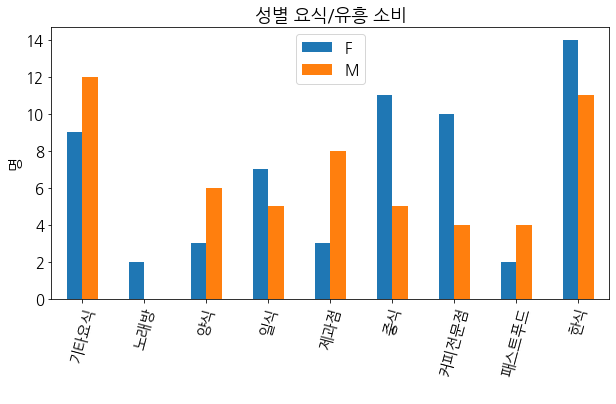

In [11]:
# 가장 많은 요식/유흥을 더 분석

pd.pivot_table(df_food, index='소분류(CLASS3)', columns='성별(GEDNER)', values='count').plot(kind='bar',figsize=(10,5))
plt.xlabel(' ', fontsize=15)
plt.ylabel('명', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.legend(fontsize=15)
plt.title('성별 요식/유흥 소비', fontsize=18)

- 이번엔 연령대별 주 소비업종을 분석한 결과, 모든 업종에서 30대의 소비가 가장 크다는걸 알 수 있었습니다. 또한 20대~40대의 소비가 전체 소비의 큰 비중을 차지합니다.

Text(0.5, 1.0, '연령별 소비업종')

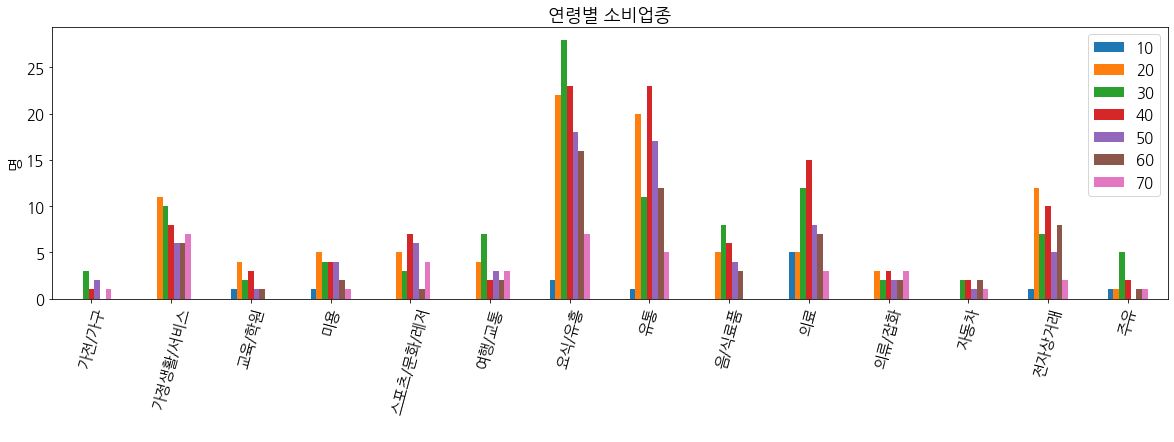

In [12]:
# 연령대별 소비업종 파악

df_age= df15.groupby(['연령대별(AGE)','대분류(CLASS1)'])['count'].sum().reset_index()
pd.pivot_table(df_age, index='대분류(CLASS1)', columns='연령대별(AGE)', values='count').plot(kind='bar',figsize=(20,5))
plt.xlabel(' ', fontsize=15)
plt.ylabel('명', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.legend(fontsize=15)
plt.title('연령별 소비업종', fontsize=18)

# 2. 시간대별 소액결제건수 카드소비패턴
- 각 시간대별 카드소비패턴을 분석 해보겠습니다.

In [13]:
df2 = pd.read_csv('/content/drive/MyDrive/카드 소비/블록별 시간대별소액결제건수 카드소비패턴.csv', encoding='cp949')
df2

,서울시민업종코드(UPJONG_CD),기준년월(YM),시간대구간(TIME),고객주소블록코드(BLOCK_CD),카드이용금액계(AMT_CORR),소액결제건수(MICRO_PYM)
0,SS017,202006,6,11063,257,25
1,SS013,201608,6,216137,86,10
2,SS016,201802,3,224819,35,15
3,SS055,201906,2,19869,10,0
4,SS038,201612,5,28382,10,5
...,...,...,...,...,...,...
495,SS017,201911,5,366735,5,5
496,SS016,201803,2,155750,10,30
497,SS081,202103,3,366426,5,5
498,SS069,201707,3,214935,70,10


- 시간대별 카드이용금액, 소액결졔건수를 group 시킵니다.

In [14]:
df_micro = df2[['시간대구간(TIME)','카드이용금액계(AMT_CORR)','소액결제건수(MICRO_PYM)']]
df_micro = df_micro.groupby('시간대구간(TIME)').sum().reset_index()

- 이용금액은 오후(4)에 가장 크고, 소액결제건수는 오후(3)에 가장 높은걸 알 수 있습니다.

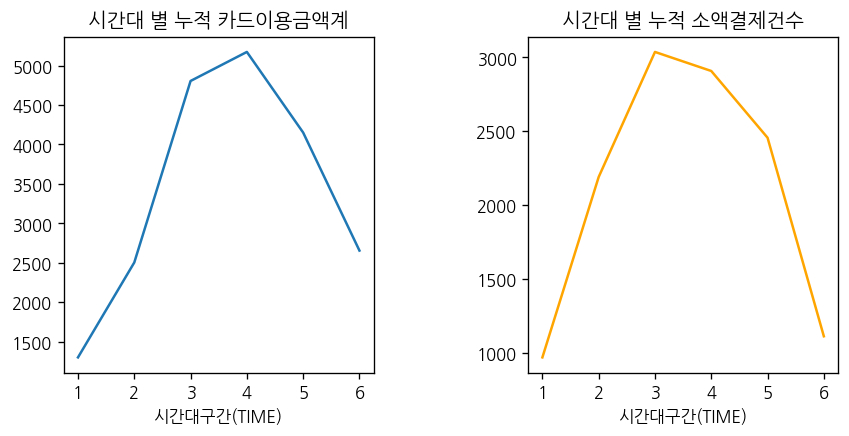

In [15]:
fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('시간대 별 누적 카드이용금액계')
df_micro.plot(x='시간대구간(TIME)',y='카드이용금액계(AMT_CORR)',kind='line',ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[1].set_title('시간대 별 누적 소액결제건수')
df_micro.plot(x='시간대구간(TIME)',y='소액결제건수(MICRO_PYM)',kind='line',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=0)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35)

- 위와 동일한 방법으로 2,5번째 데이터를 병합 하겠습니다. 그러므로 시간별 소비업종을 파악 할 수 있습니다.

In [16]:
df25 = pd.merge(df2, df5, how='inner', left_on='서울시민업종코드(UPJONG_CD)', right_on='업종코드(UPJONG_CD)')
df25 = df25[['시간대구간(TIME)','대분류(CLASS1)','중분류(CLASS2)','소분류(CLASS3)']]
df25['count'] = 1

- 두 시간대별로 묶어서 진행 하겠습니다.

In [17]:
df25['시간대']='NONE'
df25.loc[(df25['시간대구간(TIME)'] >= 1) & (df25['시간대구간(TIME)'] <= 2),'시간대']='1~2'
df25.loc[(df25['시간대구간(TIME)'] >= 3) & (df25['시간대구간(TIME)'] <=4),'시간대']='3~4'
df25.loc[(df25['시간대구간(TIME)'] >= 5) & (df25['시간대구간(TIME)'] <=6),'시간대']='5~6'

- 주로 3~4시간대에 각 업종의 소비가 많아 지는걸 알 수 있습니다.

Text(0.5, 1.0, '시간대별 소비업종')

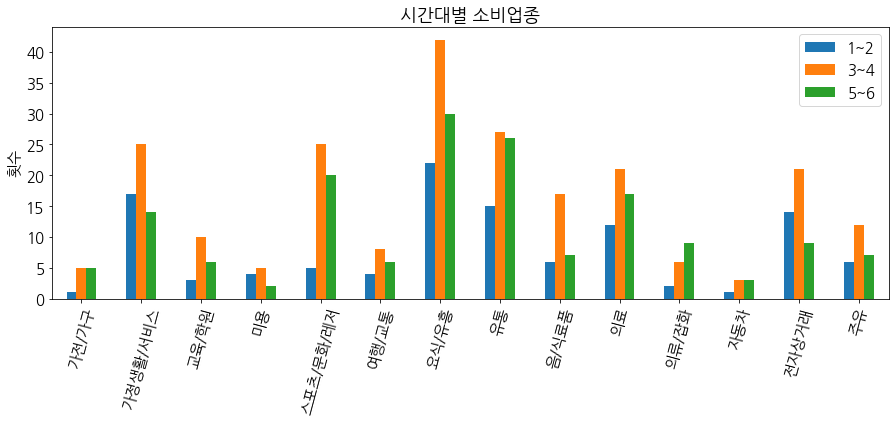

In [18]:
df_25 = df25.groupby(['시간대','대분류(CLASS1)'])['count'].sum().reset_index()
pd.pivot_table(df_25, index='대분류(CLASS1)', columns='시간대', values='count').plot(kind='bar',figsize=(15,5))
plt.xlabel(' ', fontsize=15)
plt.ylabel('횟수', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.legend(fontsize=15)
plt.title('시간대별 소비업종', fontsize=18)

# 3.집계구별 카드소비패턴
- 각 집계구별 카드소비패턴을 분석 해보겠습니다.

- 데이터를 불러오고 광역시와 시/군/구 데이터를 확인 해봤습니다. 그러나 모든 광역시가 알맞은 시/군/구를 포함하지 않고 있었습니다.

In [19]:
df3 = pd.read_csv('/content/drive/MyDrive/카드 소비/집계구별 일별소비지역별 카드소비패턴.csv', encoding='cp949')
print(df3['가맹점주소광역시도(SIDO)'].unique())
print(df3['가맹점주소시군구(SGG)'].unique())

['서울' '경기' '인천' '제주' '경남' '강원' '대전' '광주' '부산' '경북' '충남' '충북' '대구' '전남'
 '전북' '세종']
['강남구' '관악구' '마포구' '동작구' nan '종로구' '송파구' '용인시' '중구' '용산구' '성북구' '노원구'
 '서초구' '강서구' '중랑구' '화성시' '남양주시' '가평군' '서대문구' '광진구' '부천시' '양천구' '파주시'
 '영등포구' '수원시' '구리시' '성남시' '도봉구' '광주시' '은평구' '옹진군' '구로구' '시흥시' '동대문구' '강동구'
 '안산시' '고양시' '김포시' '평택시' '성동구' '강북구' '이천시' '연수구' '의정부시' '양주시' '남동구' '금천구'
 '부평구' '오산시' '강화군' '하남시' '광명시' '안양시' '양평군']


- 더 확인해보니, 일부 경기도의 지역이 서울에 포함되어 었습니다 (ex: 서울시 양평군). 경기도 뿐만 아니라 다른 지역도 동일 합니다. 그러므로 다른 지역의 시/군/구를 임의로 서울의 구로 지정했다 생각하고 진행하겠습니다.

In [20]:
df_seoul = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울')]
df_seoul['가맹점주소시군구(SGG)'].unique()  

array(['강남구', '관악구', '마포구', '동작구', nan, '중구', '송파구', '용산구', '성북구', '노원구',
       '서초구', '중랑구', '화성시', '용인시', '남양주시', '종로구', '가평군', '서대문구', '부천시',
       '양천구', '파주시', '영등포구', '수원시', '광주시', '은평구', '시흥시', '동대문구', '강동구',
       '안산시', '구로구', '고양시', '성남시', '김포시', '평택시', '성동구', '강북구', '이천시',
       '의정부시', '양주시', '강서구', '광진구', '금천구', '도봉구', '부평구', '안양시', '하남시',
       '양평군', '구리시'], dtype=object)

- 다른 지역은 납두고 서울에 포함되어 있는 시/군/구만 수정해주겠습니다.

In [21]:
# 서울시에만 포함된 다른 지역의 시/군/구를 수정

df3.loc[df3['가맹점주소시군구(SGG)'] == '화성시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '용인시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '남양주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '부천시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '파주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '수원시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '광주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '시흥시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '안산시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '고양시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '성남시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '김포시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '평택시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '이천시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '의정부시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '양주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '안양시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '하남시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '구리시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '가평군', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '양평군', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '부평구', '가맹점주소광역시도(SIDO)'] = '인천'

df_seoul = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울')]

- folium을 사용하기 이전에 api로 불러 올 지도 데이터에는 지역이름, 지역코드등으로 매핑을 할 수 있습니다, 하지만 주어진 데이터와 이름이 달라 매핑이 안되므로 일일히 지역코드를 추가 했습니다..!

In [22]:
# 매핑을 위해 지역코드를 삽입
df_sido = df3.groupby('가맹점주소광역시도(SIDO)').sum().reset_index() # 가맹점주소광역시도로 group
def code(row):
    if row['가맹점주소광역시도(SIDO)'] == '강원':
        val = '32'
    if row['가맹점주소광역시도(SIDO)'] == '경기':
        val = '31'
    if row['가맹점주소광역시도(SIDO)'] == '경남':
        val = '38'
    if row['가맹점주소광역시도(SIDO)'] == '경북':
        val = '37'
    if row['가맹점주소광역시도(SIDO)'] == '광주':
        val = '24'
    if row['가맹점주소광역시도(SIDO)'] == '대구':
        val = '22'
    if row['가맹점주소광역시도(SIDO)'] == '대전':
        val = '25'
    if row['가맹점주소광역시도(SIDO)'] == '부산':
        val = '21'
    if row['가맹점주소광역시도(SIDO)'] == '서울':
        val = '11'
    if row['가맹점주소광역시도(SIDO)'] == '세종':
        val = '29'
    if row['가맹점주소광역시도(SIDO)'] == '인천':
        val = '23'
    if row['가맹점주소광역시도(SIDO)'] == '전남':
        val = '36'
    if row['가맹점주소광역시도(SIDO)'] == '전북':
        val = '35'
    if row['가맹점주소광역시도(SIDO)'] == '전남':
        val = '36'
    if row['가맹점주소광역시도(SIDO)'] == '제주':
        val = '39'
    if row['가맹점주소광역시도(SIDO)'] == '충남':
        val = '34'
    if row['가맹점주소광역시도(SIDO)'] == '충북':
        val = '33'
    return val

df_sido['시/도 코드'] = df_sido.apply(code, axis=1)

- folium 사용을 위해 광역시/도 경계선 json파일을 api로 불러오겠습니다.

출처: [https://github.com/southkorea/southkorea-maps](https://github.com/southkorea/southkorea-maps):


In [23]:
import urllib.request 
import json 
import folium
from pandas.io.json import json_normalize

url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
response = urllib.request.urlopen(url) 
geo_str = response.read().decode("utf-8")
geo_object = json.loads(geo_str)

- 저는 수도권과 비수도권으로 데이터를 나눠 봤습니다. 주어진 데이터에 서울/경기/인천이 다른 지역과 차이가 많이 나서 다 같이 하기엔 지도 시각화에 무리가 있었습니다ㅠ. 그래서 비교적 인구가 많은 수도권은 일단 제외하고 비수도권의 카드이용패턴부터 시각화 했습니다.

In [24]:
df_other = df_sido.drop(df_sido[(df_sido['가맹점주소광역시도(SIDO)'] == '경기') | (df_sido['가맹점주소광역시도(SIDO)'] == '서울') | (df_sido['가맹점주소광역시도(SIDO)'] == '인천')].index)

- folium을 사용해 지도 시각화를한 결과입니다. 누적 카드이용금액으로는 비수도권 지역중 강원도가 제일 많았습니다.(울산은 광역시지만 데이터가 존재 하지않아 시각화가 되지 않았습니다.)

In [25]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')

map.choropleth(geo_data = geo_object,
               data = df_other,
               columns = ['시/도 코드','카드이용금액계(AMT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = '누적 카드이용금액',
               )
map

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


- 누적 카드이용건수로는 전라남도와 강원도가 높은걸 알 수 있습니다.

In [26]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')
map1.choropleth(geo_data = geo_object,
               data = df_other,
               columns = ['시/도 코드','카드이용건수계(USECT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = '누적 카드이용건수',
               )
map1

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


- 이번엔 수도권의 카드이용패턴을 분석한 결과, 서울은 누적 이용건수가 누적 이용금액보다 컸으며, 경기도와 인천은 반대의 모습을 보여 주었습니다.

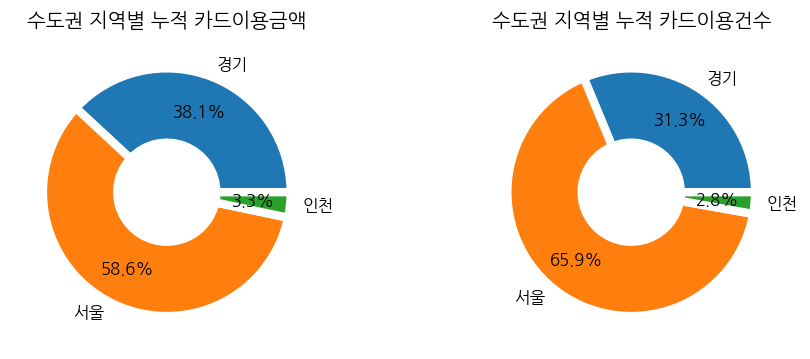

In [27]:
# 수도권의 카드이용금액, 이용건수 파악
df_sudo = df_sido[(df_sido['가맹점주소광역시도(SIDO)'] == '서울') | (df_sido['가맹점주소광역시도(SIDO)'] == '경기')
                 | (df_sido['가맹점주소광역시도(SIDO)'] == '인천')]

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}
axes[0].pie(df_sudo['카드이용금액계(AMT_CORR)'],labels=df_sudo['가맹점주소광역시도(SIDO)']
            ,autopct='%.1f%%',wedgeprops=wedgeprops ,pctdistance=0.7)
axes[0].set_title('수도권 지역별 누적 카드이용금액')
axes[1].pie(df_sudo['카드이용건수계(USECT_CORR)'],labels=df_sudo['가맹점주소광역시도(SIDO)']
            ,autopct='%.1f%%',wedgeprops=wedgeprops, pctdistance=0.7)
axes[1].set_title('수도권 지역별 누적 카드이용건수')

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35) 

- 이번엔 서울시의 데이터를 지도 시각화하기 위해 서울시 구별 경계선 json파일을 불러오겠습니다.

출처: [https://github.com/southkorea/southkorea-maps](https://github.com/southkorea/southkorea-maps)

In [28]:
# 서울시 구별 경계선 json 파일
# json 파일 출처: https://github.com/southkorea/southkorea-maps
import urllib.request 
import json 
import folium
from pandas.io.json import json_normalize

url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_municipalities_geo_simple.json"
response = urllib.request.urlopen(url) 
geo_str = response.read().decode("utf-8")
geo_object = json.loads(geo_str)

- 위와 동일하게 이미 주어진 지역이름으로도 가능하지만, 다른 지역과 이름이 겹치는 구가 존재합니다 (ex: 서울 중구/대구 중구). 그러므로 다시 지역코드를 일일히 추가 해줬습니다.

In [29]:
# 매핑을 위해 지역코드를 삽입
# 지역 이름도 가능하지만, 다른 지역과 이름이 겹치는 구가 존재함 (서울 중구/대구 중구)
df_seoul = df_seoul.groupby('가맹점주소시군구(SGG)').sum().reset_index()

def gucode(row):
    if row['가맹점주소시군구(SGG)'] == '강동구':
        val = '11250'
    if row['가맹점주소시군구(SGG)'] == '강북구':
        val = '11090'
    if row['가맹점주소시군구(SGG)'] == '종로구':
        val = '11010'
    if row['가맹점주소시군구(SGG)'] == '중구':
        val = '11020'
    if row['가맹점주소시군구(SGG)'] == '용산구':
        val = '11030'
    if row['가맹점주소시군구(SGG)'] == '성동구':
        val = '11040'
    if row['가맹점주소시군구(SGG)'] == '광진구':
        val = '11050'
    if row['가맹점주소시군구(SGG)'] == '동대문구':
        val = '11060'
    if row['가맹점주소시군구(SGG)'] == '중랑구':
        val = '11070'
    if row['가맹점주소시군구(SGG)'] == '성북구':
        val = '11080'
    if row['가맹점주소시군구(SGG)'] == '도봉구':
        val = '11100'
    if row['가맹점주소시군구(SGG)'] == '노원구':
        val = '11110'
    if row['가맹점주소시군구(SGG)'] == '은평구':
        val = '11120'
    if row['가맹점주소시군구(SGG)'] == '서대문구':
        val = '11130'
    if row['가맹점주소시군구(SGG)'] == '마포구':
        val = '11140'
    if row['가맹점주소시군구(SGG)'] == '양천구':
        val = '11150'
    if row['가맹점주소시군구(SGG)'] == '강서구':
        val = '11160'
    if row['가맹점주소시군구(SGG)'] == '구로구':
        val = '11170'
    if row['가맹점주소시군구(SGG)'] == '금천구':
        val = '11180'
    if row['가맹점주소시군구(SGG)'] == '영등포구':
        val = '11190'
    if row['가맹점주소시군구(SGG)'] == '동작구':
        val = '11200'
    if row['가맹점주소시군구(SGG)'] == '관악구':
        val = '11210'
    if row['가맹점주소시군구(SGG)'] == '서초구':
        val = '11220'
    if row['가맹점주소시군구(SGG)'] == '강남구':
        val = '11230'
    if row['가맹점주소시군구(SGG)'] == '송파구':
        val = '11240'
    return val

df_seoul['구 코드'] = df_seoul.apply(gucode, axis=1)

- 지도로 보니, 카드이용금액은 역시나 강남구, 그 다음으로는 마포구가 많았습니다.

In [30]:
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')
map2.choropleth(geo_data = geo_object,
               data = df_seoul,
               columns = ['구 코드','카드이용금액계(AMT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = '누적 카드이용금액',
               )
map2

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


- 하지만 카드이용건수는 마포구가 더 많았으며, 아마 대학가(대학생)의 이유이지 않을까 생각합니다.

In [31]:
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')
map2.choropleth(geo_data = geo_object,
               data = df_seoul,
               columns = ['구 코드','카드이용건수계(USECT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = '누적 카드이용건수',
               )
map2

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


- 이번에는 수도권과 비수도권의 업종별 카드이용패턴을 분석 해보겠습니다.

In [32]:
# 수도권/비수도권의 업종 별 카드이용금액/이용건수 파악
df_sudo = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울') | (df3['가맹점주소광역시도(SIDO)'] == '경기') # 수도권
                  | (df3['가맹점주소광역시도(SIDO)'] == '인천')]
df_other= df3[(df3['가맹점주소광역시도(SIDO)'] != '서울') & (df3['가맹점주소광역시도(SIDO)'] != '경기') # 비수도권
                  & (df3['가맹점주소광역시도(SIDO)'] != '인천')]

df_sudo = df_sudo.groupby(['업종대분류(UPJONG_CLASS1)']).sum().reset_index()
df_other = df_other.groupby(['업종대분류(UPJONG_CLASS1)']).sum().reset_index()

- 전체적으로 수도권의 카드이용급액이 더 크다는걸 알 수 있습니다. 당연하게도 인구밀집도의 영향으로 추정됩니다. 비수도권의 경우에는 휴양지,산업등으로 인해 스포츠/문화레저, 여행/교통 소비가 더 큰 것으로 추정됩니다. 요식/유흥, 유통은 수도권, 비수도권 공통 가장 높은 소비인걸 알 수 있습니다.

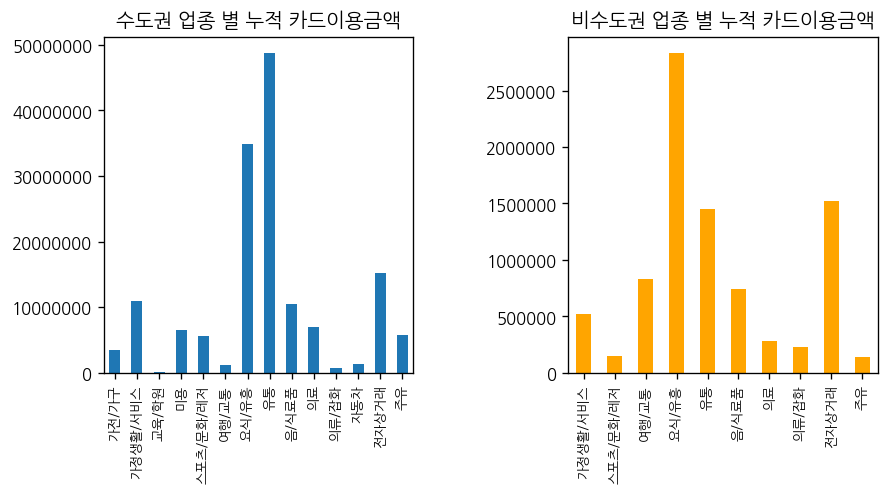

In [33]:
fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)

axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('수도권 업종 별 누적 카드이용금액')
df_sudo.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용금액계(AMT_CORR)',kind='bar',ax=axes[0],)
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('비수도권 업종 별 누적 카드이용금액')
df_other.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용금액계(AMT_CORR)',kind='bar',ax=axes[1]
              ,color='orange')
axes[1].tick_params(axis='x', rotation=90)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
axes[0].set_xticklabels(df_sudo['업종대분류(UPJONG_CLASS1)'], fontsize=8)
axes[1].set_xticklabels(df_other['업종대분류(UPJONG_CLASS1)'], fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35)

- 이번에도 전체적으로 수도권의 카드이용건수가 더 많습니다. 수도권의 경우 유통의 카드이용건수가 제일 많으며, 그 다음으로는 요식/유흥, 전자상거래 입니다. 비수도권의 경우 요식/유흥의 이용건수가 가장 많고, 그 다음으로는 가정생활/서비스 입니다. 

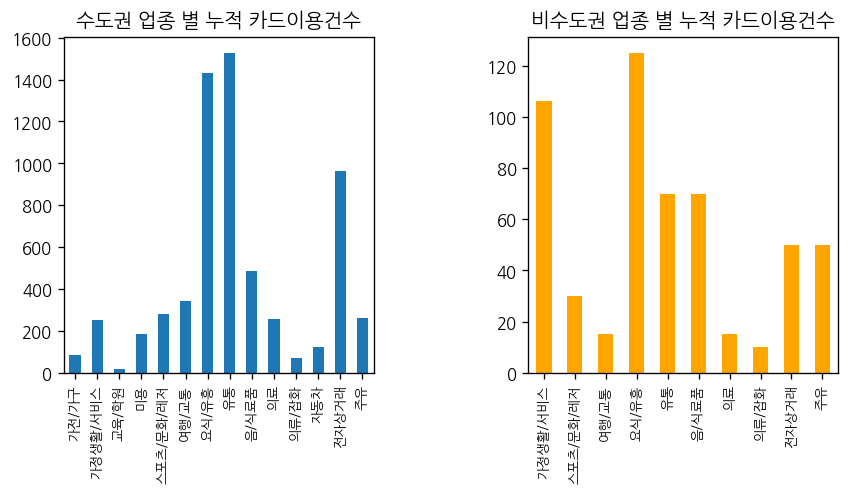

In [34]:
fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)

axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('수도권 업종 별 누적 카드이용건수')
df_sudo.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용건수계(USECT_CORR)',kind='bar',ax=axes[0],)
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('비수도권 업종 별 누적 카드이용건수')
df_other.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용건수계(USECT_CORR)',kind='bar',ax=axes[1] ,color='orange')
axes[1].tick_params(axis='x', rotation=90)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
axes[0].set_xticklabels(df_sudo['업종대분류(UPJONG_CLASS1)'], fontsize=8)
axes[1].set_xticklabels(df_other['업종대분류(UPJONG_CLASS1)'], fontsize=8)
plt.subplots_adjust(left=0.125,bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35)

# 4) 년도별 카드소비패턴
- 마지막으로 년도별 카드소비패턴을 분석 해보겠습니다.

In [35]:
df4 = pd.read_csv('/content/drive/MyDrive/카드 소비/집계구별 일별시간대별 카드소비패턴.csv', encoding='cp949')

- '기준일자(YMD)' column을 datetime64으로 바꿔주겠습니다.

In [36]:
df4['기준일자(YMD)'] = pd.to_datetime(df4['기준일자(YMD)'], format='%Y%m%d')

df_temp = df4[['기준일자(YMD)','카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)']]
df_time = df_temp.copy()  # SettingWithCopy Warning 방지 
# 편의상 '년도' 와 '월' column을 생성
df_time['년도'] = df4['기준일자(YMD)'].dt.year
df_time['월'] = df4['기준일자(YMD)'].dt.month

- 가장 최근/마지막 데이터는 2021년 7월 31일 입니다

In [37]:
df_time.sort_values(['기준일자(YMD)'],ascending=False).head(2)

,기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),년도,월
407,2021-07-31,1190048,5,2021,7
49,2021-07-31,629188,35,2021,7


- 년도별 누적 카드이용금액/건수를 분석한 결과, 카드이용금액은 2018년에 하락한 후, 2019년에 급격한 상승을 보인 반면, 카드이용건수는 2017년에 하락 후, 2019년에 상승을 보였지만 2017년의 하락을 넘지는 못하였습니다. 2021년의 급 하락은 아직 2021년 7월 31일까지의 데이터밖에 없어서 그렇습니다.

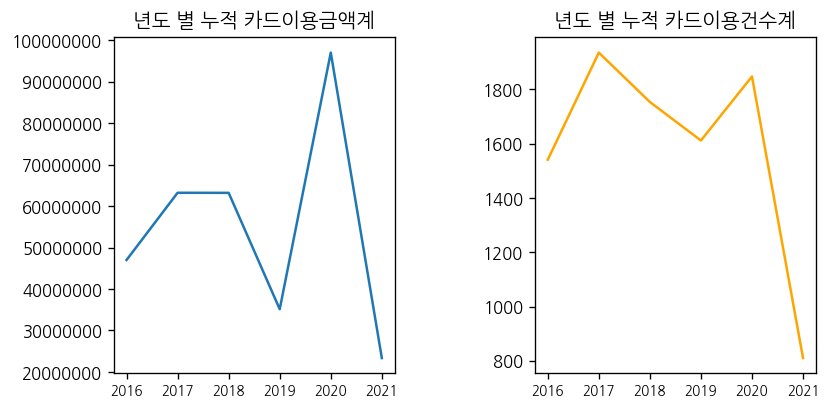

In [38]:
# 년도별 누적 카드이용금액/건수
df_year = df_time.groupby('년도').sum().reset_index()

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('년도 별 누적 카드이용금액계')
df_year.plot(x='년도',y='카드이용금액계(AMT_CORR)',kind='line',ylabel='누적 카드이용금액계명',ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[1].set_title('년도 별 누적 카드이용건수계')
df_year.plot(x='년도',y='카드이용건수계(USECT_CORR)',kind='line',ylabel='누적 카드이용금액계명',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=0)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].set_xticklabels(df_year['년도'], fontsize=8)
axes[1].set_xticklabels(df_year['년도'], fontsize=8)
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
axes[0].set_xticks(df_year['년도'])
axes[1].set_xticks(df_year['년도'])

plt.subplots_adjust(left=0.125,bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)

- 가장 최근인 2021년의 월별 카드이용금액/건수 입니다.

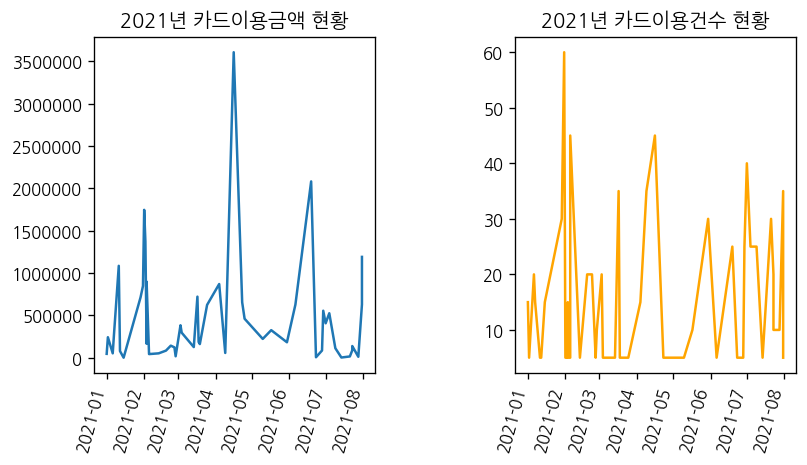

In [39]:
df_2021 = df_time[(df_time['년도'] == 2021)]

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('2021년 카드이용금액 현황')
df_2021.plot(x='기준일자(YMD)',y='카드이용금액계(AMT_CORR)',kind='line',ax=axes[0])
axes[0].tick_params(axis='x', rotation=75)
axes[1].set_title('2021년 카드이용건수 현황')
df_2021.plot(x='기준일자(YMD)',y='카드이용건수계(USECT_CORR)',kind='line',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=75)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)

- 마지막으로 아직 2021년이 미완성이므로, 1년전인 2020년의 카드이용패턴을 알아봤습니다. 두 년도 모두 가파른 상승과 하락을 보인 달이 있지만, 동일하지는 않습니다.

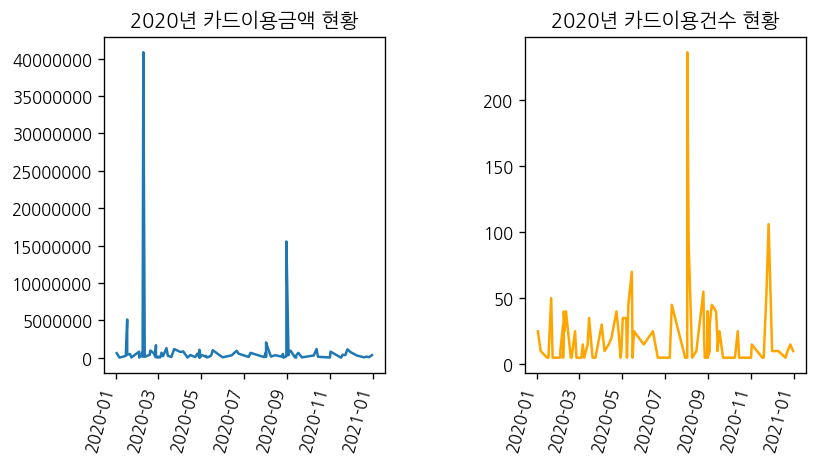

In [40]:
df_2020 = df_time[(df_time['년도'] == 2020)]

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('2020년 카드이용금액 현황')
df_2020.plot(x='기준일자(YMD)',y='카드이용금액계(AMT_CORR)',kind='line',ax=axes[0])
axes[0].tick_params(axis='x', rotation=75)
axes[1].set_title('2020년 카드이용건수 현황')
df_2020.plot(x='기준일자(YMD)',y='카드이용건수계(USECT_CORR)',kind='line',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=75)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)

이렇게 저의 첫 데이콘 코드공유가 끝났습니다..! 끝까지 봐주신 여러분들 정말 감사합니다. 여러분의 조언과 개선사항을 참고하여 스스로 발전 하겠습니다. 다시 한번 미숙한 저의 시각화/분석을 봐주셔서 감사드립니다!